In [2]:
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
#sns.set_theme()

In [4]:
# загрузка изображений
images = {k: [] for k in [0, 1,2,3,4,5,6,7,8,9]}
for k in images.keys():
    for i in range(0, 100):
        i_r = i if len(str(i)) == 2 else '0' + str(i)
        img = plt.imread(f'samples/{k}_{i_r}.png')
        img[img != 0] = 1.
        images[k].append(img)

In [5]:
# цифры для построения разделяющей гиперплоскости
o1 = 3
o2 = 7

In [8]:
# функция, строющая разделяющую гиперплоскость
def get_w(o1, o2):
    o1_images = np.array(images[o1])
    o2_images = np.array(images[o2])
    o1_images = o1_images/np.linalg.norm(o1_images, axis=(1,2))[:, np.newaxis, np.newaxis]
    o2_images = o2_images/np.linalg.norm(o2_images, axis=(1,2))[:, np.newaxis, np.newaxis]
    e1 = np.sum(o1_images, axis=0)/100
    e2 = np.sum(o2_images, axis=0)/100
    w = np.array(e2 - e1)
    return w, e1,e2

# функция, возвращающая частоты неверной классификации
def get_frqs(o1, o2, sigmas, N=100):
    assert N <= 100
    w = get_w(o1, o2)
    freqs = []
    for sigma in sigmas:
        correct_preds = 0
        for i in [o1, o2]:
            for j in range(N):
                real_image = images[i][j].copy()
                img_noice = real_image + np.random.normal(0, sigma, size=(28,28))
                img_noice[img_noice>1] = 1
                img_noice[img_noice<0] = 0
                predict = np.sum(img_noice*w)
                if predict < 0 and i == o1:
                    correct_preds += 1
                if predict > 0 and i == o2:
                    correct_preds += 1
        freqs.append(1-correct_preds/(2*N))
    return freqs

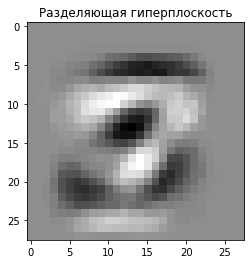

In [12]:
plt.title('Разделяющая гиперплоскость')
w, e1,e2 = get_w(3, 7)

plt.imshow(w, cmap='gray')
#plt.show()

In [10]:
sigmas = [0.05, 0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 5, 7, 10]
fs = get_frqs(o1, o2, sigmas = sigmas)

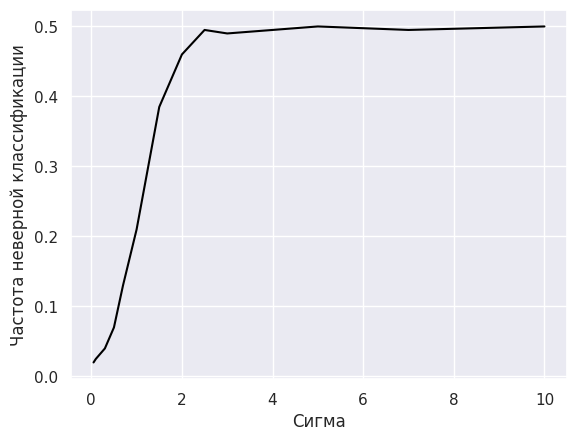

In [11]:
plt.ylabel('Частота неверной классификации')
plt.xlabel('Сигма')
plt.plot(sigmas, fs, color='black')
plt.show()